### Import libraries

In [105]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### merging sales data

In [69]:
frames = []
directory = "Sales_Data"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and f[-3:] == "csv":
            tempdf = pd.read_csv(f)
            frames.append(tempdf.dropna(how="all"))
df_all_months = pd.concat(frames)
df_all_months = df_all_months[df_all_months['Order ID'] != "Order ID"]
df_all_months.to_csv("all_data.csv", index=False)

### Import all sales data

In [70]:
df_all_sales = pd.read_csv("all_data.csv")
df_all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add additional coloums

#### Task 1:Add month

In [71]:
df_all_sales["Month"] = df_all_sales["Order Date"].str[0:2]
df_all_sales["Month"] = df_all_sales["Month"].astype('int32')

#### Task 2: Add a sales

In [98]:
df_all_sales['Total Sales'] = df_all_sales['Quantity Ordered'] * df_all_sales['Price Each']
df_all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Question 1: What was the best month for sales? 

In [100]:
results = df_all_sales.groupby(['Month']).sum()
results.sort_values(by='Total Sales',ascending=0)

,Order ID,Quantity Ordered,Price Each,Total Sales
Month,,,,
12,7685904705,28114,4588415.41,4613443.34
10,5457110383,22703,3715554.83,3736726.88
4,3387347100,20558,3367671.02,3390670.24
11,5047202573,19798,3180600.68,3199603.20
5,3345871523,18667,3135125.13,3152606.75
3,2564810956,17005,2791207.83,2807100.38
7,3284139576,16072,2632539.56,2647775.76
6,2932976072,15253,2562025.61,2577802.26
8,2899373917,13448,2230345.42,2244467.88


#### Plot results

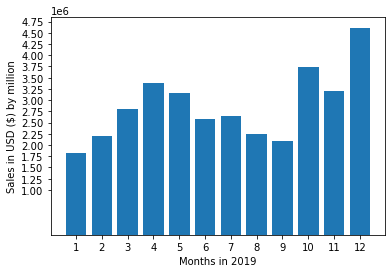

In [110]:
months = range(1, 13)
plt.bar(months, results['Total Sales'])
plt.xlabel("Months in 2019")
plt.xticks(months)
plt.ylabel('Sales in USD ($) by million')
plt.yticks(np.arange(1000000, 5000000, 250000))
plt.show()